<a href="https://colab.research.google.com/github/happycode-ch/pandas_colab/blob/main/3_Methods_and_Handeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Series: Part-2, Methods and Handeling


### Reading in Data With read_csv()

In [1]:
# https://andybeck.com/pandas-drinks

In [212]:
import pandas as pd
import numpy as np

In [3]:
pd.read_csv('https://andybek.com/pandas-drinks') # dataframe from csv

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [4]:
pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [5]:
pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country')

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [6]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country')

In [7]:
alcohol.head()

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0


In [8]:
type(alcohol)

pandas.core.frame.DataFrame

In [9]:
# read_csv() method allways returns a dataframe / squeeze boolean, default=False

In [10]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country', squeeze=True) # returns a Series rather than a df

<ipython-input-10-604601290aea>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country', squeeze=True) # returns a Series rather than a df


In [11]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [12]:
type(alcohol)

pandas.core.series.Series

In [13]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country').squeeze('columns') # not depreciated, yet

In [14]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

### Series sizing with .size, .shape, and len()

In [15]:
alcohol.size

193

In [16]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [17]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [18]:
# alcohol.read_sql('SELECT int_column, date_column FROM test_data', conn) - SQL

In [19]:
alcohol.values.size == alcohol.index.size

True

In [20]:
alcohol.shape

(193,)

In [21]:
alcohol.size == alcohol.size

True

In [22]:
len(alcohol)

193

### Unique Values And Series Monotonicity

In [23]:
alcohol.is_unique

False

In [24]:
alcohol.head().is_unique

True

In [25]:
alcohol.nunique()

71

In [26]:
alcohol.nunique(dropna=False) # now includes NaN values

72

In [27]:
alcohol.is_monotonic_increasing

False

In [28]:
alcohol.is_monotonic_decreasing

False

In [29]:
pd.Series([1,2,3]).is_monotonic_increasing

True

In [30]:
pd.Series([3,2,1]).is_monotonic_decreasing

True

In [31]:
pd.Series([1,3,3,3,3,3,2]).is_monotonic_increasing

False

In [32]:
pd.Series([1,3,3,3,3,45,2114]).is_monotonic_increasing

True

### The count() method

In [33]:
alcohol.count() # method returns number of non-NA/null observations in the Series

162

In [34]:
alcohol.size # this property returns null's

193

In [35]:
alcohol.hasnans # property shows data has null values

True

### Accessing And Counting NA's

In [36]:
alcohol.count()

162

In [37]:
alcohol.size

193

In [38]:
alcohol.isnull() # returns series of booleans

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [39]:
alcohol[alcohol.isnull()].index # returns pandas object

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [40]:
list(alcohol[alcohol.isnull()].index) # list of strings, countries that have NaN's

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [41]:
len(list(alcohol[alcohol.isnull()].index)) # cumbersome way to do this, difficult to work with

31

In [42]:
alcohol.isnull().sum() # a more Pandorable way to achieve the results (list length), sum of the booleans(integers)

31

In [43]:
sum([True, False, True])

2

In [44]:
all = alcohol.size

In [45]:
nonulls = alcohol.count()

In [46]:
nulls = alcohol.isnull().sum()

In [47]:
all == nonulls + nulls

True

### BONUS: Boolans are litterally numbers in Python

In [48]:
True + 19

20

In [49]:
True + True - False + True * 3

5

In [50]:
# 5 / False  Produces Division Error

In [51]:
type(True)

bool

In [52]:
bool.__mro__

(bool, int, object)

### Skill Challenge

1. Isolate the non-nulls in the alcohol series and assign them to the variable *wine_servings*.

In [53]:
wine_servings = pd.Series(data=alcohol[alcohol.notnull()], index=alcohol[alcohol.notnull()].index)

In [54]:
wine_servings = alcohol.loc[alcohol.notna()]

2.  What is the total wine consumed by countries in wine_servings

In [55]:
wine_servings

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [56]:
wine_servings.head()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

In [57]:
wine_servings.sum()

8221.0

3. Bonus: Countries with less than 100 servings

In [58]:
wine_servings_lt_100 = wine_servings[wine_servings < 100]

In [59]:
wine_servings_lt_100.notna()

country
Albania              True
Algeria              True
Angola               True
Antigua & Barbuda    True
Armenia              True
                     ... 
Vanuatu              True
Venezuela            True
Vietnam              True
Zambia               True
Zimbabwe             True
Name: wine_servings, Length: 132, dtype: bool

In [60]:
wine_servings_lt_100 = wine_servings[wine_servings < 100].sum()

In [61]:
wine_servings_lt_100

2416.0

### Dropping And Filling NAs

In [62]:
alcohol.dropna() #creates and returns a non-modified version of the original series

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [63]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [64]:
# alcohol = alcohol.dropna() reassignment (one way)

In [65]:
# alcohol.dropna(inplace=True) inplace param (another way), will modify the original data

In [66]:
alcohol.fillna(100, inplace=False) # replaces NAs with something else

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

### Descriptive Statistics, allowing for characterization or descriptions of data

In [67]:
alcohol.sum() # NAs are automatically excluded from calculation, not distributed

8221.0

In [68]:
# average
alcohol.sum() / alcohol.count()

50.74691358024691

In [69]:
alcohol.mean()

50.74691358024691

In [70]:
# Median: middelmost element / number
alcohol.median()

11.5

In [71]:
alcohol.quantile(q=.5)

11.5

In [72]:
alcohol.quantile(.5)

11.5

The large gap between mean()=50.74.. and median()=11.5, lets us know that there are countries with large servings of alcohol that distort the data, right skewed, positive skew (more data /high value observations, than low)

Negative skew is the exact opposite.

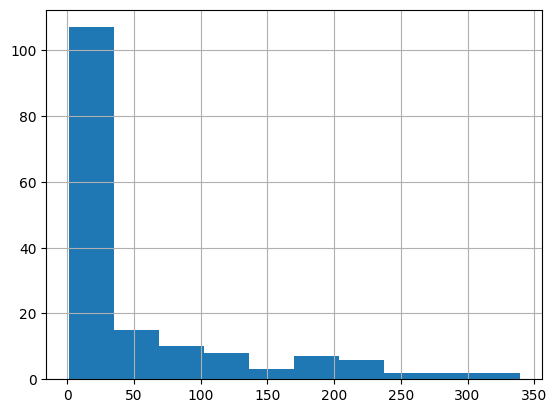

In [73]:
alcohol.hist(); # mean exceeds the median

In [74]:
# Inter Quantile Range or IQR: Statistics - Difference between the first and third quantiles
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)

In [75]:
iqr # data is not distributed symetrically, almost five times the median

58.25

In [76]:
# min and max
alcohol.min()

1.0

In [77]:
alcohol.max()

339.0

In [78]:
# standard deviation
alcohol.std()

76.13491716376171

In [79]:
# variance
alcohol.var()

5796.5256115328575

In [80]:
alcohol.std()**2 == alcohol.var()

True

### The describe() Method

In [81]:
alcohol.describe() # returns a pandas series containing descritive satistics

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [82]:
alcohol.describe(percentiles=[.79, .19])

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [83]:
alcohol.describe(percentiles=[.79, .19], include=float, exclude=object)

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

### mode() and value_counts() Descriptive Statistics


In [84]:
# mode has the highest frequency, highest value

In [85]:
alcohol.mode() # most common occuring wine serving = 1

0    1.0
Name: wine_servings, dtype: float64

In [86]:
alcohol == 1 # trues have value of 1

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam         True
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [87]:
alcohol[alcohol==1].size

28

In [88]:
# value_counts() returns a series containing unique values and their counts
alcohol.value_counts(sort=True, ascending=False, dropna=True, normalize=False)

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

In [89]:
alcohol.value_counts().iloc[0]

28

In [90]:
alcohol.value_counts(sort=True, ascending=False, dropna=True, normalize=True) # realtive frequencies

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

In [91]:
28 / alcohol.count()

0.1728395061728395

### idmax() And idxmin() Note: if there are multiple values, these methods will only return the first

In [92]:
alcohol.max()

339.0

In [93]:
alcohol[alcohol == alcohol.max()] # boolean mask

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [94]:
alcohol[alcohol == alcohol.max()].index[0]

'Portugal'

In [95]:
alcohol.idxmax()

'Portugal'

In [96]:
alcohol.idxmin() # probelm is that this is not the only country with a serving size of 1, there are in fact 28. the result is the alphabetically first result

'Brunei'

In [97]:
alcohol[alcohol == alcohol.min()]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [98]:
alcohol[alcohol.idxmax()]

339.0

In [99]:
alcohol.max()

339.0

### Sorting with sort_values()

In [100]:
alcohol.sort_values()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [101]:
alcohol.sort_values(ascending=False)

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [102]:
alcohol.sort_values(ascending=False, na_position='first')

country
Afghanistan                 NaN
Bangladesh                  NaN
Bhutan                      NaN
Burundi                     NaN
North Korea                 NaN
                           ... 
Jordan                      1.0
Solomon Islands             1.0
Central African Republic    1.0
Haiti                       1.0
Chad                        1.0
Name: wine_servings, Length: 193, dtype: float64

In [103]:
alcohol.sort_values(ascending=False, na_position='last', kind='quicksort') # mergesort merge #heapsort heap (quicksort is performant for most cases) / returns a copy of the Series

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [104]:
# if you want to change the underlying data: reasignment or inplace
# alcohol.sort_values(ascending=False, na_position='last', kind='quicksort', inplace=True)

In [105]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

### nlargest() and nsmallest()

In [106]:
alcohol.min()

1.0

In [107]:
alcohol.max()

339.0

In [108]:
alcohol.sort_values(ascending=False)[:10]

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [109]:
alcohol.nlargest(n=10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [110]:
alcohol.nsmallest(29)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
El Salvador                 2.0
Name: wine_servings, dtype: float64

### sort_values() and sort_index()

In [111]:
alcohol = alcohol.copy()

In [112]:
alcohol.sort_values(ascending=False, na_position='last', kind='quicksort', inplace=True)

In [113]:
alcohol.head()

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
Name: wine_servings, dtype: float64

In [114]:
alcohol.sort_index(ascending=False, na_position='first')

country
Zimbabwe         4.0
Zambia           4.0
Yemen            NaN
Vietnam          1.0
Venezuela        3.0
               ...  
Angola          45.0
Andorra        312.0
Algeria         14.0
Albania         54.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [115]:
alcohol.index.isnull().sum()

0

In [116]:
alcohol.head()

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
Name: wine_servings, dtype: float64

In [117]:
alcohol.sort_index(ascending=False, na_position='first', inplace=True)

In [118]:
alcohol.index.isnull().sum()

0

In [119]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

### Skill Challenge
1. Select all the countries from alcohol that have more than 50 wine servings, and save them (and the corresponding values) in a var *fifty_plus*

2. From fifty_plus, choose the countries with the smallest 20 wine servings values

3. What is the mean, median and the standard deviation for the sample from step 2

In [120]:
# 1,
alcohol[alcohol > 50].sort_values()

country
Bahamas                51.0
Seychelles             51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Gabon                  59.0
Estonia                59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Paraguay               74.0
Cook Islands           74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Slovakia              116.0
Laos                  123.0
Serbia                127.0
Montenegro            128.0
Norway                129.0
Czech Republic        134.0
Georgia               149.0
Ireland               165.0
Romania               167.0
Chile                 172.0
New Zealand           175.0
Germany               175.0
Hungary               185.0
Sweden                186.0
Austria               191.0
United Kingd

In [121]:
fifty_plus = alcohol[alcohol > 50].sort_values()

In [122]:
fifty_plus

country
Bahamas                51.0
Seychelles             51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Gabon                  59.0
Estonia                59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Paraguay               74.0
Cook Islands           74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Slovakia              116.0
Laos                  123.0
Serbia                127.0
Montenegro            128.0
Norway                129.0
Czech Republic        134.0
Georgia               149.0
Ireland               165.0
Romania               167.0
Chile                 172.0
New Zealand           175.0
Germany               175.0
Hungary               185.0
Sweden                186.0
Austria               191.0
United Kingd

In [123]:
fifty_plus.head()

country
Bahamas       51.0
Seychelles    51.0
Albania       54.0
Lithuania     56.0
Poland        56.0
Name: wine_servings, dtype: float64

In [124]:
fifty_plus.count()

48

In [125]:
# 2,
fifty_plus.sort_values()[:20]

country
Bahamas                51.0
Seychelles             51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Gabon                  59.0
Estonia                59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Cook Islands           74.0
Paraguay               74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

In [126]:
fifty_plus.nsmallest(n=20)

country
Bahamas                51.0
Seychelles             51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Gabon                  59.0
Estonia                59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Paraguay               74.0
Cook Islands           74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

In [127]:
fifty_plus.nsmallest(n=20).describe()

count     20.000000
mean      74.250000
std       19.072921
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      113.000000
Name: wine_servings, dtype: float64

In [128]:
fifty_plus.nsmallest(n=20).median()

73.5

### Series Arithmetics and fill_value()

In [129]:
alcohol + 2

country
Zimbabwe         6.0
Zambia           6.0
Yemen            NaN
Vietnam          3.0
Venezuela        5.0
               ...  
Angola          47.0
Andorra        314.0
Algeria         16.0
Albania         56.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [130]:
(alcohol - 10)*2

country
Zimbabwe       -12.0
Zambia         -12.0
Yemen            NaN
Vietnam        -18.0
Venezuela      -14.0
               ...  
Angola          70.0
Andorra        604.0
Algeria          8.0
Albania         88.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [131]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

In [132]:
alcohol.sort_index(inplace=True)

In [133]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [140]:
more_drinks = pd.Series({'Albania' : 6, 'Algeria': 10, 'Afghanistan': 1, 'Yemen': 1})

In [141]:
alcohol + more_drinks

Afghanistan     NaN
Albania        60.0
Algeria        24.0
Andorra         NaN
Angola          NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 193, dtype: float64

In [142]:
alcohol.add(more_drinks, fill_value=0)

Afghanistan      1.0
Albania         60.0
Algeria         24.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            1.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [143]:
alcohol.subtract(more_drinks, fill_value=0)

Afghanistan     -1.0
Albania         48.0
Algeria          4.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen           -1.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [144]:
alcohol.divide(more_drinks, fill_value=1)

Afghanistan      1.0
Albania          9.0
Algeria          1.4
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            1.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [145]:
alcohol.multiply(more_drinks, fill_value=1)

Afghanistan      1.0
Albania        324.0
Algeria        140.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            1.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [146]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [147]:
more_drinks.head()

Albania         6
Algeria        10
Afghanistan     1
Yemen           1
dtype: int64

### BONUS: Calculating Variance And Standard Deviation

In [148]:
alcohol.var() # Variance: average of squared differences from the mean

5796.5256115328575

In [149]:
(alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1)

5796.5256115328575

In [150]:
alcohol.std()

76.13491716376171

In [153]:
((alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1))**(1/2) # square root of var calculation [149]

76.13491716376171

### Cumulative Operations

In [154]:
# sum
alcohol.sum()

8221.0

In [155]:
alcohol.cumsum() # NaN's are skipped

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [157]:
alcohol.cumsum(skipna=False)

country
Afghanistan   NaN
Albania       NaN
Algeria       NaN
Andorra       NaN
Angola        NaN
               ..
Venezuela     NaN
Vietnam       NaN
Yemen         NaN
Zambia        NaN
Zimbabwe      NaN
Name: wine_servings, Length: 193, dtype: float64

In [158]:
alcohol.cumsum(skipna=True)

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [160]:
alcohol.prod()

3.4276115052182805e+183

In [162]:
alcohol.cumprod()

country
Afghanistan              NaN
Albania         5.400000e+01
Algeria         7.560000e+02
Andorra         2.358720e+05
Angola          1.061424e+07
                   ...      
Venezuela      2.142257e+182
Vietnam        2.142257e+182
Yemen                    NaN
Zambia         8.569029e+182
Zimbabwe       3.427612e+183
Name: wine_servings, Length: 193, dtype: float64

In [163]:
alcohol.cumprod()[-1] == alcohol.prod()

True

In [164]:
# cummin cummax

In [165]:
alcohol.min()

1.0

In [166]:
alcohol.cummin()

country
Afghanistan     NaN
Albania        54.0
Algeria        14.0
Andorra        14.0
Angola         14.0
               ... 
Venezuela       1.0
Vietnam         1.0
Yemen           NaN
Zambia          1.0
Zimbabwe        1.0
Name: wine_servings, Length: 193, dtype: float64

In [167]:
alcohol.max()

339.0

In [168]:
alcohol.cummax()

country
Afghanistan      NaN
Albania         54.0
Algeria         54.0
Andorra        312.0
Angola         312.0
               ...  
Venezuela      339.0
Vietnam        339.0
Yemen            NaN
Zambia         339.0
Zimbabwe       339.0
Name: wine_servings, Length: 193, dtype: float64

### Pairwise Differences With diff()

In [169]:
# used to calculate the discrete difference between pairs in a series

In [170]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [171]:
alcohol.diff().head()

country
Afghanistan      NaN
Albania          NaN
Algeria        -40.0
Andorra        298.0
Angola        -267.0
Name: wine_servings, dtype: float64

In [172]:
alcohol.diff(periods=2).head()

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        258.0
Angola          31.0
Name: wine_servings, dtype: float64

In [173]:
# diff() finds the first discrete element-wise difference in a series

### Series Iteration

In [174]:
mini_alc = alcohol[:10]

In [175]:
mini_alc

country
Afghanistan            NaN
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [176]:
for i in mini_alc:
  print(i)

nan
54.0
14.0
312.0
45.0
45.0
221.0
11.0
212.0
191.0


In [178]:
for i in mini_alc.index:
  print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [179]:
for i in mini_alc.index:
  print(i, mini_alc[i])

Afghanistan nan
Albania 54.0
Algeria 14.0
Andorra 312.0
Angola 45.0
Antigua & Barbuda 45.0
Argentina 221.0
Armenia 11.0
Australia 212.0
Austria 191.0


In [180]:
for i in mini_alc.items():
  print(i) # lazily evaluated tuples

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


In [182]:
for i in mini_alc.iteritems():
  print(i) # == items()

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


<ipython-input-182-177a7d864668>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i in mini_alc.iteritems():


### Filtering: filter(), where(), And mask()

In [184]:
# regex
alcohol.filter(regex='^V') # specifing a text pattern

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [185]:
alcohol.filter(like='stan') # filters by index, not values

country
Afghanistan      NaN
Kazakhstan      12.0
Kyrgyzstan       6.0
Pakistan         NaN
Tajikistan       NaN
Turkmenistan    32.0
Uzbekistan       8.0
Name: wine_servings, dtype: float64

In [186]:
alcohol[alcohol > 200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [188]:
alcohol.loc[alcohol > 200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [189]:
def gt200(x):
  return x > 200

In [190]:
alcohol[gt200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [191]:
# the where() method, efficently replace values where a given condition is False
alcohol.where(lambda x: x>200, other='too small')

country
Afghanistan    too small
Albania        too small
Algeria        too small
Andorra            312.0
Angola         too small
                 ...    
Venezuela      too small
Vietnam        too small
Yemen          too small
Zambia         too small
Zimbabwe       too small
Name: wine_servings, Length: 193, dtype: object

In [193]:
alcohol.where(lambda x: x>200) # defaults to NaN, False condition

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        312.0
Angola           NaN
               ...  
Venezuela        NaN
Vietnam          NaN
Yemen            NaN
Zambia           NaN
Zimbabwe         NaN
Name: wine_servings, Length: 193, dtype: float64

In [194]:
alcohol.where(lambda x: x>200).dropna()

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [195]:
alcohol.where(lambda x: x<=200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

In [196]:
# the mask() method., replaces values if the condition is Ture, opposite to where() method


In [197]:
alcohol.mask(lambda x: x<=200).dropna()

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [198]:
alcohol.mask(lambda x: x>200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

### Transforming With update() - modifies series values in place using another sereis, apply() - applies function (or ufunc) on each series value -most flexible, And map() - subs series values with others from a function, series, or dict -more input types (spot vs global transforms)

In [199]:
# spot vs global transformations
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [200]:
alcohol.loc['Algeria'] = 19

In [201]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         19.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [202]:
# method doesn't scale well
alcohol.loc['Albania'] = 190
alcohol.loc['Afghanistan'] = 20
alcohol.loc['Andorra'] = 29

In [203]:
alcohol.head(10)

country
Afghanistan           20.0
Albania              190.0
Algeria               19.0
Andorra               29.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [204]:
# the update method

In [207]:
alcohol.update(pd.Series(data=[200, 20], index=['Albania', 'Algeria'])) # updates in place, doesn't return values

In [208]:
alcohol.head(10)

country
Afghanistan           20.0
Albania              200.0
Algeria               20.0
Andorra               29.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [209]:
# global transform, the apply() method

In [210]:
alcohol.apply(lambda x: x**2)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [213]:
alcohol.apply(np.square)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [214]:
def multiply_by_self(x):
  return x*x

In [215]:
alcohol.apply(multiply_by_self)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [217]:
def multiply_by_self_with_min(x, min_servings):
  if x < min_servings:
    return x**2

  return x

In [218]:
alcohol.apply(multiply_by_self_with_min, args=(200,))

country
Afghanistan     400.0
Albania         200.0
Algeria         400.0
Andorra         841.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [219]:
alcohol.apply(multiply_by_self_with_min, min_servings=200) # specifying the parameter by name

country
Afghanistan     400.0
Albania         200.0
Algeria         400.0
Andorra         841.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [221]:
# the map() method (typically used as a substitution method)
alcohol.apply(multiply_by_self_with_min, args=(200,))

country
Afghanistan     400.0
Albania         200.0
Algeria         400.0
Andorra         841.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

### Skill Challenge

1. Read the drinks.csv dataset again, this time bringing in the beer_servings sequence into a new series with country again acting as the index. Assign this series ot the variable beers.

2. Calculate the mean, median, and standard deviation of beer servings in beers. Is the distribution right or left skewed?

3. Slice the first 10 countries from beers. Are these relatively large or small relative to the rest of the sample?

BONUS: To answer that, we could compare each value to the mean or median. An even better approach would be to calculate standar scores, or z-scores as the are known.



In [222]:
# 1.

In [227]:
beers = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'beer_servings'], index_col='country').squeeze('columns')

In [232]:
beers.head()

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
Name: beer_servings, dtype: float64

In [244]:
# 2.

In [229]:
beers.mean()

102.87078651685393

In [246]:
beers.median()

60.0

In [247]:
beers.quantile(.5)

60.0

In [231]:
beers.std() # Return sample standard deviation over requested axis.

100.6457126793478

In [248]:
beers.var()**(1/2)

100.6457126793478

In [235]:
beers

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
               ...  
Venezuela      333.0
Vietnam        111.0
Yemen            6.0
Zambia          32.0
Zimbabwe        64.0
Name: beer_servings, Length: 193, dtype: float64

The large gap between mean()=
102.87.. and median()=60.0, lets us know that there are countries with large servings of alcohol that distort the data, right skewed, positive skew (more data /high value observations, than low)

Negative skew is the exact opposite.

<Axes: >

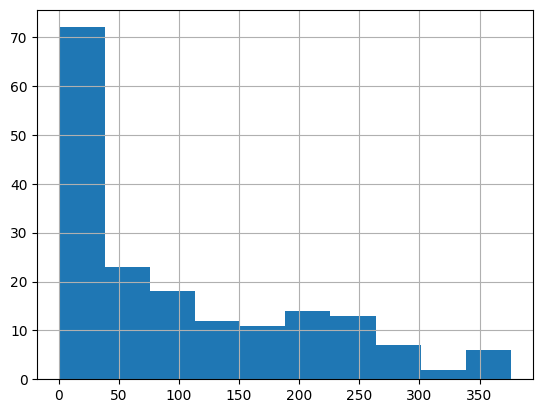

In [236]:
beers.hist()

In [245]:
# 3.

In [237]:
first_10_beers = beers[:10]

In [238]:
first_10_beers

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

In [239]:
beers.max()

376.0

In [249]:
beers[:10]

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

In [250]:
beers[:10] - beers.mean()

country
Afghanistan                 NaN
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Name: beer_servings, dtype: float64

In [251]:
(beers[:10] - beers.mean()).apply(lambda x: 'low' if x<0 else 'high')

country
Afghanistan          high
Albania               low
Algeria               low
Andorra              high
Angola               high
Antigua & Barbuda     low
Argentina            high
Armenia               low
Australia            high
Austria              high
Name: beer_servings, dtype: object

In [252]:
(beers - beers.mean()).apply(lambda x: 'low' if x<0 else 'high').value_counts()

low     112
high     81
Name: beer_servings, dtype: int64

In [253]:
# calculate z score, the number of standard deviations that a given observations is different from the sample mean
z_scores = (beers - beers.mean())/beers.std()

In [258]:
z_scores.head(10)

country
Afghanistan               NaN
Albania             -0.137818
Algeria             -0.773712
Andorra              1.412174
Angola               1.133970
Antigua & Barbuda   -0.902878
Argentina            0.895510
Armenia             -0.813455
Australia            1.571147
Austria              1.749992
Name: beer_servings, dtype: float64

In [259]:
z_scores.min()

-1.0121721413152407

In [260]:
z_scores.max()

2.713768984410912

In [261]:
z_scores.abs().max()

2.713768984410912

In [262]:
beers.idxmax()

'Namibia'

In [263]:
beers['Namibia']

376.0

In [266]:
z_scores.abs().max() * beers.std() + beers.mean()

376.0